In [1]:
#Imports
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline
import env
# This is to make sure matplotlib doesn't throw the following error:
# The next line fixes "TypeError: float() argument must be a string or a number, not 'Timestamp' matplotlib"
pd.plotting.register_matplotlib_converters()


In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt.gz',
                      engine='python',
                     header=None,
                     index_col=False,
                     sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                     na_values='"-"',
                     )

Rename:
- 0 to date
    - because it's YYYY-MM-DD
- 1 to time
    - because it's HH:MM:SS
- 2 to webpage_accessed
    - because it's it's a add on to a base URL
- 3 to user_id
    - because there are more students than cohorts
- 4 to cohort_id
    - because there are less cohorts than student
- 5 to ip_address
    - because it's an ip number

In [3]:
df.columns = ['date','time','page_viewed','user_id','cohort_id','ip']

In [4]:
df.index = pd.to_datetime(df.date + " " + df.time)

In [5]:
df = df.drop(columns=['date','time'], axis=1)

In [6]:
df.user_id.value_counts()

11     17913
64     16347
53     12329
314     7783
1       7404
       ...  
952        1
212        1
940        1
649        1
879        1
Name: user_id, Length: 981, dtype: int64

In [7]:
df.cohort_id.value_counts()

28.0     84031
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [8]:
df.cohort_id.isnull().sum()

52893

In [9]:
df.user_id.isnull().sum()

0

In [10]:
df.value_counts()

page_viewed                      user_id  cohort_id  ip             
/                                11       28.0       97.105.19.58       571
jquery/ajax/weather-map          428      28.0       70.121.183.95      529
index.html                       53       14.0       97.105.19.58       501
/                                64       28.0       71.150.217.33      448
                                 11       28.0       76.185.145.231     407
                                                                       ... 
java-iii/jsp-and-jstl            330      29.0       170.248.173.246      1
                                 335      29.0       172.58.103.188       1
                                 336      29.0       72.181.99.44         1
                                 337      29.0       99.203.154.102       1
%20https://github.com/RaulCPena  580      55.0       74.192.167.159       1
Length: 178700, dtype: int64

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'cohort_id'}>]], dtype=object)

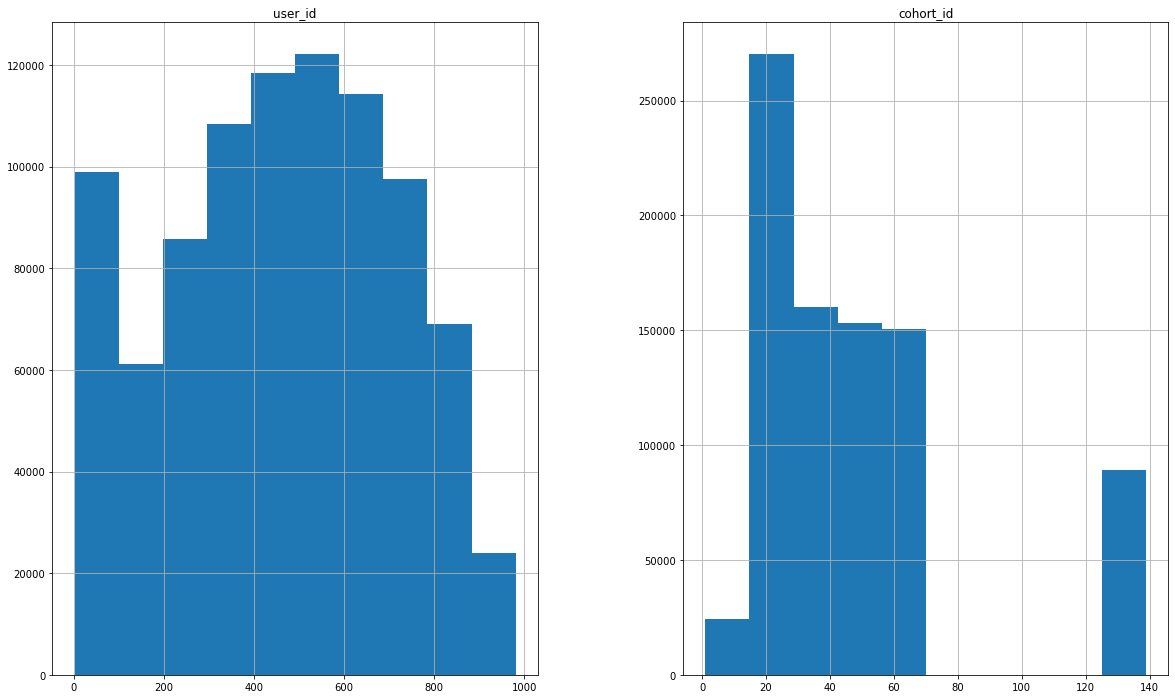

In [11]:
df.hist(figsize=(20, 12))

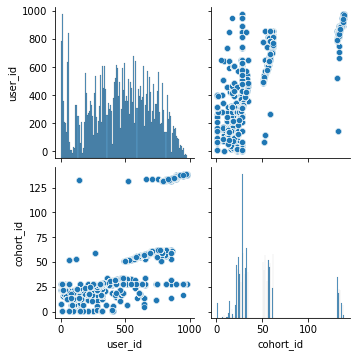

In [12]:
sns.pairplot(df)

In [13]:
df['cohort_id'] = df.cohort_id.fillna(0)

In [14]:
cohort_df = df[df.cohort_id == 0]

In [15]:
# index range same as original df
cohort_df.index

DatetimeIndex(['2018-01-26 16:46:16', '2018-01-26 16:46:24',
               '2018-01-26 17:54:24', '2018-01-26 18:32:03',
               '2018-01-26 18:32:17', '2018-01-26 18:32:33',
               '2018-01-26 18:32:37', '2018-01-26 18:32:43',
               '2018-01-26 18:32:47', '2018-01-26 18:33:07',
               ...
               '2021-04-21 12:47:54', '2021-04-21 12:47:56',
               '2021-04-21 12:48:04', '2021-04-21 12:48:37',
               '2021-04-21 12:48:52', '2021-04-21 12:49:00',
               '2021-04-21 12:49:02', '2021-04-21 12:51:27',
               '2021-04-21 12:52:37', '2021-04-21 12:56:26'],
              dtype='datetime64[ns]', length=52893, freq=None)

In [16]:
for col in cohort_df.columns:
    print(col)
    print(cohort_df[col].value_counts(),'\n')

page_viewed
/                                                          4459
search/search_index.json                                   1985
javascript-i                                                780
toc                                                         706
spring                                                      641
                                                           ... 
10-nlp/pos-tagging                                            1
classification/explore                                        1
content/php_i/intro-to-operators/logical-operators.html       1
spring/form-model-binding                                     1
4-python/7.4.4-advanced-dataframes                            1
Name: page_viewed, Length: 1112, dtype: int64 

user_id
354    2965
736    2358
363    2248
716    2136
368    2085
       ... 
644       6
62        4
663       4
176       3
89        3
Name: user_id, Length: 78, dtype: int64 

cohort_id
0.0    52893
Name: cohort_id, dtype: int64 


In [17]:
df.ip.str.split(".")[0][0]

'97'

In [18]:
cohort_df["ip_int"] = cohort_df.ip.str.replace(".","")

In [19]:
# Calculating the short-window simple moving average
#short_rolling = 

cohort_df.rolling(window=12).mean()

,user_id,cohort_id
2018-01-26 16:46:16,NaN,NaN
2018-01-26 16:46:24,NaN,NaN
2018-01-26 17:54:24,NaN,NaN
2018-01-26 18:32:03,NaN,NaN
2018-01-26 18:32:17,NaN,NaN
...,...,...
2021-04-21 12:49:00,717.0,0.0
2021-04-21 12:49:02,717.0,0.0
2021-04-21 12:51:27,717.0,0.0
2021-04-21 12:52:37,717.0,0.0


Text(0, 0.5, 'count of page accesses')

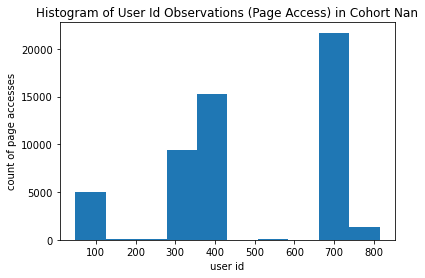

In [20]:
plt.hist(cohort_df.user_id)
plt.title("Histogram of User Id Observations (Page Access) in Cohort Nan")
plt.xlabel('user id')
plt.ylabel('count of page accesses')

In [21]:
cohort_df.user_id.mode()

0    354
dtype: int64

In [22]:
print('user_id:', cohort_df.groupby('user_id')['ip'].size().idxmax(), 'has the most page views at:',cohort_df.groupby('user_id')['ip'].size().max())

user_id: 354 has the most page views at: 2965


In [23]:
cohort_df[cohort_df.user_id == 841]

,page_viewed,user_id,cohort_id,ip,ip_int


<AxesSubplot:>

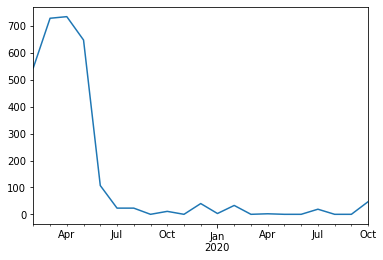

In [24]:
cohort_df[cohort_df.user_id == 354].ip.resample('M').count().plot()


In [25]:
cohort_df.groupby('user_id')['ip'].size()

user_id
48     1581
54      146
58      462
59       42
61      816
       ... 
744      69
782     370
810     709
814     187
815      46
Name: ip, Length: 78, dtype: int64

In [26]:
cohort_df[cohort_df.user_id == 48].page_viewed.value_counts().head(10)


/                      115
javascript-i            52
java-ii                 52
html-css                40
java-iii                40
jquery                  38
spring                  33
javascript-ii           30
mysql                   26
java-ii/collections     25
Name: page_viewed, dtype: int64

In [27]:
cohort_df[cohort_df.user_id == 354].page_viewed.value_counts().head(10)

search/search_index.json        485
/                               313
Intro_to_Regression_Module       82
4.6.3_introduction_to_pandas     72
3.0-mysql-overview               39
Regression_Python                38
6_Exercises                      36
6.4_Prep                         31
4.1_introduction                 31
4.2_data_types_and_variables     30
Name: page_viewed, dtype: int64

In [28]:
cohort_df[cohort_df.user_id == 48].ip.value_counts()

66.69.62.219      934
216.177.189.26    394
97.105.19.61      175
99.181.55.111      55
136.62.15.120      16
206.121.139.66      7
Name: ip, dtype: int64

In [29]:
cohort_df[cohort_df.user_id == 354].ip.value_counts()


97.105.19.58       2065
45.23.250.16        741
192.171.117.210      81
173.172.170.236      24
70.114.4.43          23
23.116.219.97        19
97.77.169.2           5
107.77.218.198        3
107.77.219.34         1
192.67.54.12          1
107.77.218.225        1
68.201.199.176        1
Name: ip, dtype: int64

In [30]:
brandon = df[df.ip == '99.162.244.233']
brandon.head()

,page_viewed,user_id,cohort_id,ip
2021-04-03 14:57:53,clustering/project,841,133.0,99.162.244.233
2021-04-03 14:57:56,/,841,133.0,99.162.244.233
2021-04-03 14:58:17,clustering/project,841,133.0,99.162.244.233
2021-04-04 13:52:50,clustering/wrangle,841,133.0,99.162.244.233
2021-04-05 10:06:56,clustering/explore,841,133.0,99.162.244.233


# SQL

In [31]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [32]:
def get_data():
    '''
    Grab our data from path and read as dataframe
    '''
    
    df = pd.read_sql('''
                        Select * 
                        FROM logs
                        Left join cohorts on cohorts.id = logs.cohort_id;
                        ''', get_connection('curriculum_logs'))

    
    return df

In [33]:
df = get_data()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [34]:
# drop redundant columns 
df = df.drop(columns = ['deleted_at', 'slack'])

In [35]:
#check
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   start_date  847330 non-null  object 
 9   end_date    847330 non-null  object 
 10  created_at  847330 non-null  object 
 11  updated_at  847330 non-null  object 
 12  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 89.3+ MB


In [37]:
df['datetime'] = df['date']+ " " + df['time']
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24


In [39]:
df.datetime = pd.to_datetime(df.datetime)
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24


In [40]:
df.drop(columns = ['date', 'time'])

,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
0,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...
900218,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:41:51
900219,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:42:02
900220,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:42:09
900221,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:44:37


In [41]:
df.set_index(df.datetime)

,date,time,path,user_id,cohort_id,ip,id,name,start_date,end_date,created_at,updated_at,program_id,datetime
datetime,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:55:03
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:02
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:05
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,2018-01-26 09:56:06
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:41:51
2021-04-21 16:42:02,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:42:02
2021-04-21 16:42:09,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,2021-04-21 16:42:09


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        900223 non-null  object        
 1   time        900223 non-null  object        
 2   path        900222 non-null  object        
 3   user_id     900223 non-null  int64         
 4   cohort_id   847330 non-null  float64       
 5   ip          900223 non-null  object        
 6   id          847330 non-null  float64       
 7   name        847330 non-null  object        
 8   start_date  847330 non-null  object        
 9   end_date    847330 non-null  object        
 10  created_at  847330 non-null  object        
 11  updated_at  847330 non-null  object        
 12  program_id  847330 non-null  float64       
 13  datetime    900223 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 96.2+ MB


In [43]:
df.describe()

,user_id,cohort_id,id,program_id
count,900223.000000,847330.000000,847330.000000,847330.000000
mean,458.825707,48.501049,48.501049,2.086004
std,249.296767,32.795482,32.795482,0.388231
min,1.000000,1.000000,1.000000,1.000000
25%,269.000000,28.000000,28.000000,2.000000
50%,475.000000,33.000000,33.000000,2.000000
75%,660.000000,57.000000,57.000000,2.000000
max,981.000000,139.000000,139.000000,4.000000


array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'cohort_id'}>]], dtype=object)

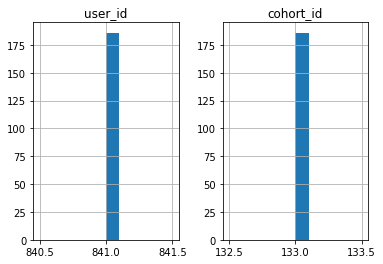

In [44]:
brandon.hist()